# ARPPU

По таблице выше мы уже знаем, что в контрольной группе она на 11.31% выше, чем в тестовой. Нужно посчитать оправдывает ли эта разница себя. Выдвигаю гипотезы: Н0 - разница в средних значениях в обоих группах отсутствует (при p > 0.05) Н1 - разница есть (при p < 0.05)

Для подсчета применяю бутстрап:

In [17]:
df_a_revenue = df_a.query('revenue != 0')
df_b_revenue = df_b.query('revenue != 0')

  0%|          | 0/1000 [00:00<?, ?it/s]

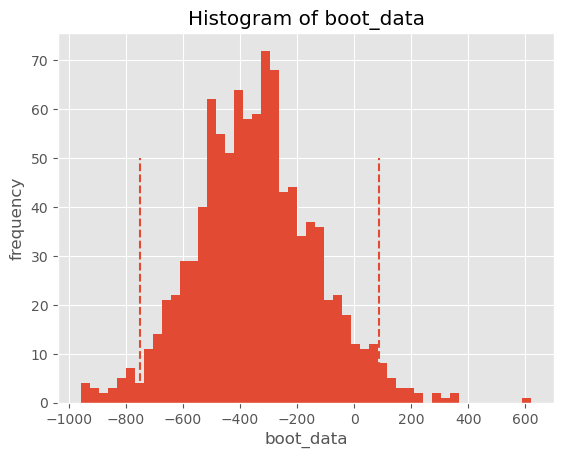

0.10498084296060238

In [18]:
bootstrap_mean_results = get_bootstrap(df_a_revenue.revenue, df_b_revenue.revenue)
bootstrap_mean_results['p_value']

In [19]:
bootstrap_mean_results['ci']

,0
0.025,-749.129435
0.975,87.727438


p > 0.05 и 0 лежит в доверительном интервале. Поэтому я не исключаю нулевую гипотезу о том, что разница в средних значениях в обеих группах отсутствует.

Сравниваю медиану:

  0%|          | 0/1000 [00:00<?, ?it/s]

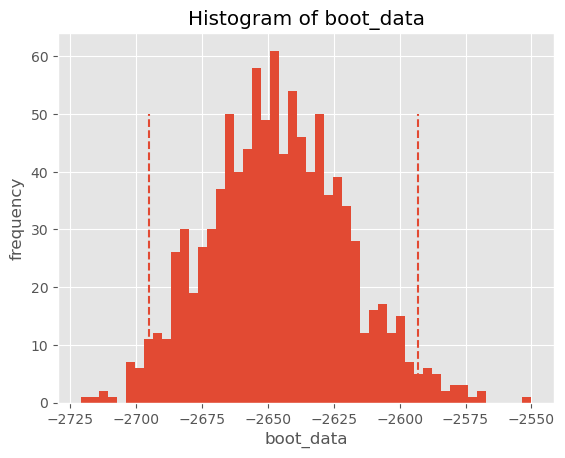

0.0

In [20]:
bootstrap_median_results = get_bootstrap(df_a_revenue.revenue, df_b_revenue.revenue, statistic = np.median)
bootstrap_median_results['p_value']

По этим результатам мы отклоняем нулевую гипотезу.

Итог: Результаты A/B-тестирования показали, что значимых статистических различий в контрольной и тестовой группах нет. Если считать 123 платежа с высокими чеками ошибкой и исключить их из данных, тогда мы можем сделать вывод о том, что новый пакет предложений стоит выкатывать на всех пользователей. Поскольку различия в ARPU без учета выбросов в контрольной группе статистически значимы. Следовательно, новый пакет предложений более прибыльный. Но сложно однозначно сказать, какая группа оказалась лучше. Если бы было больше информации о пользователях, можно было бы попробовать рассчитать другие метрики. В данном случае целесообразно обратиться к бизнесу с полученными результатами и предложить им выбрать между 1 группой, где много мелких клиентов и несколько крупных, или 2ой группой, где доход равномерный, стабильный и достаточно прогнозируемый. И даже с учетом меньшей конверсии ARPPU оказалось больше в В, чем в А. Я считаю, что изменения можно выкатить, так как с точки зрения бизнеса, лучше иметь большее количество среднеплатящих клиентов, чем зависеть от небольшого числа крупных пользователей, при оттоке которых бизнес потеряет больше денег.

P.S. Можно попробовать применить акционное предложение для тестовой группы, так как в случае оттока из контрольной группы пользователей, совершающих дорогие покупки, метрики могут упасть.